# Diabetes Prediction

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing Dataset

In [74]:
df=pd.read_csv('diabetes_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
colmns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [6]:
y=df['Outcome'].values
x=df[colmns].values

In [7]:
x=np.array(x)
y=np.array(y)

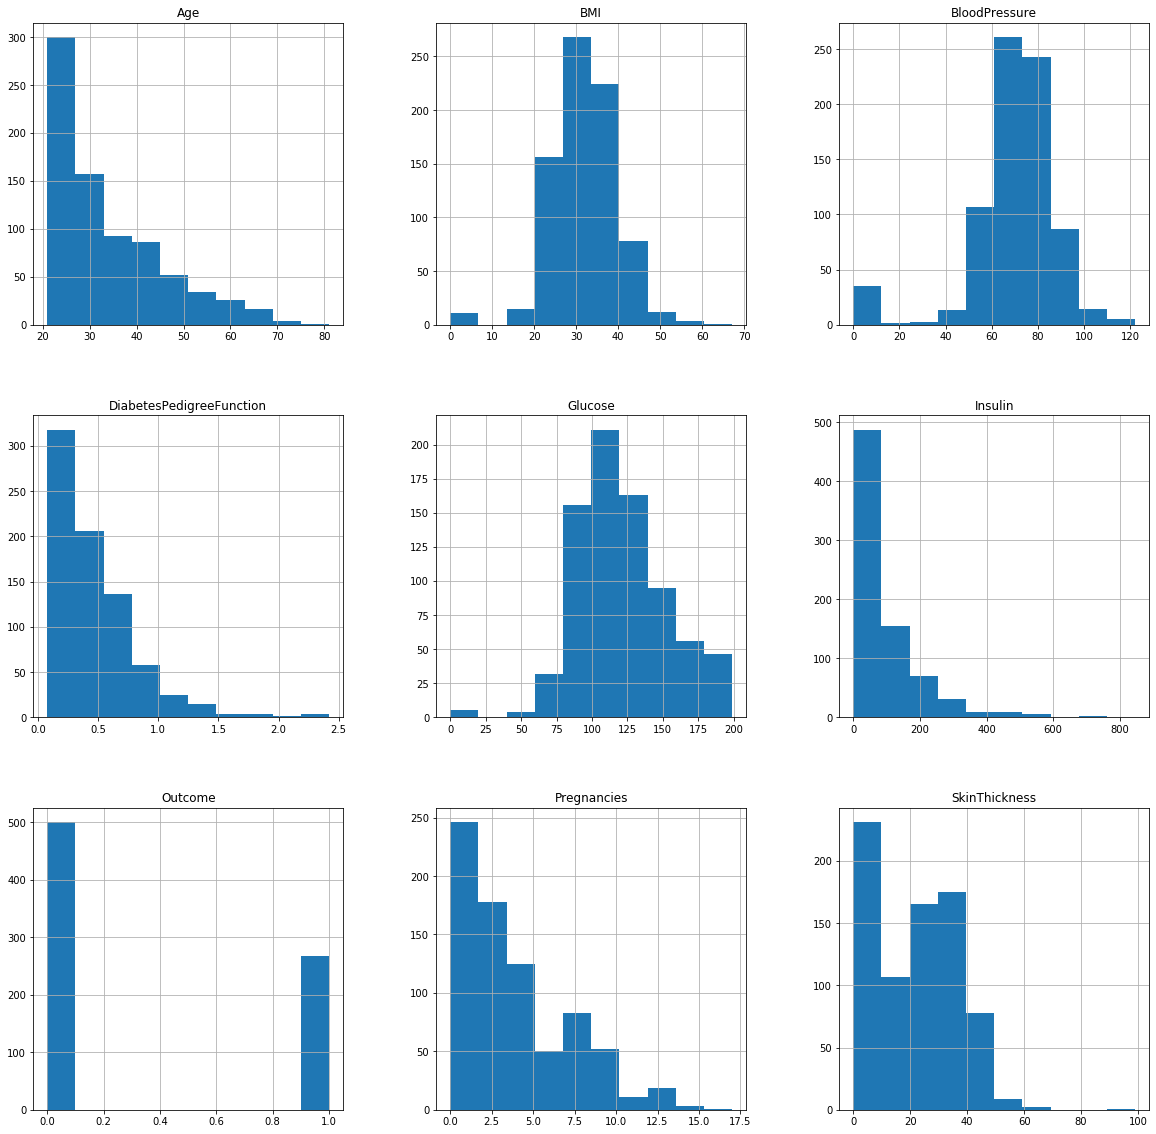

In [8]:
p = df.hist(figsize = (20,20))

## Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x=  pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [55]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


## Test Train Split and Cross Validation methods

In [56]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=40, stratify=y)

In [57]:
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)
xtest=np.array(xtest)

In [58]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(x,y,querypt,k=19):
    vals=[]
    m=x.shape[0]
    for i in range(m):
        d=dist(querypt,x[i])
        vals.append((d,y[i]))
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    newvals=np.unique(vals[:,1],return_counts=True)
    index=newvals[1].argmax()
    pred=newvals[0][index]
    return pred

In [59]:
sol=[]
for i in range(xtest.shape[0]):
    pred = knn(xtrain,ytrain,xtest[i])
    sol.append(pred)
    

In [60]:
arr=np.array(sol)


In [61]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()
knn.fit(x, y)    
predicted = knn.predict(xtest)

# Evaluating


In [62]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(xtest)
cnf_matrix=confusion_matrix(ytest,y_pred)
pd.crosstab(ytest, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,46,4,50
1,7,20,27
All,53,24,77


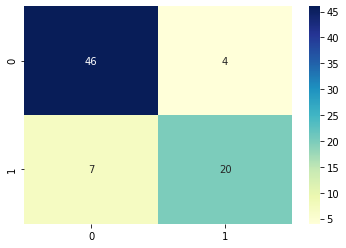

In [63]:
import seaborn as sns
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

In [64]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest,sol)

0.7177777777777777

In [65]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(ytest,sol)
acc

0.7662337662337663

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x, y)    
predicted = knn.predict(xtest)

In [67]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest,predicted)

0.8303703703703704

In [68]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest, y_pred_proba)

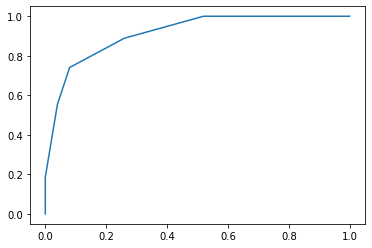

In [69]:
plt.plot(fpr,tpr,label='knn')

In [70]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest, predicted)
acc

0.8571428571428571

In [71]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predicted))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        50
           1       0.83      0.74      0.78        27

    accuracy                           0.86        77
   macro avg       0.85      0.83      0.84        77
weighted avg       0.86      0.86      0.86        77



In [72]:
from sklearn.metrics import classification_report
print(classification_report(ytest,sol))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        50
           1       0.71      0.56      0.63        27

    accuracy                           0.77        77
   macro avg       0.75      0.72      0.73        77
weighted avg       0.76      0.77      0.76        77

